## Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # Library to suppress warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

## Reading the data into the dataframe

In [34]:
df=pd.read_csv('abtest.csv') 
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [35]:
df.shape

(100, 6)

- The dataset has 100 rows and 6 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There is 1 (float64) , 1 (int64) and 4 (object) datatypes.
* Group,landing_page,converted and language_preferred columns are categorical. 
* user_id and time_spent_on_the_page are numerical

In [5]:
df['user_id'].nunique() #checking if all the users are unique

100

In [6]:
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

* There are two groups- control and treatment

In [7]:
df.landing_page.value_counts()

old    50
new    50
Name: landing_page, dtype: int64

* There are two landing pages- old and new

In [8]:
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

* The converted column has 2 values yes and no

In [9]:
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

* There are 3 languages preferred- Spanish,French and English

In [10]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


* The mean time spent on the page is 5.37 minutes
* Minimum time spent on the page is from 0.19 seconds to maximum of 10.71 minutes

## Checking missing values

In [11]:
df.isnull().sum() 

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in the dataset

## Univariate analysis

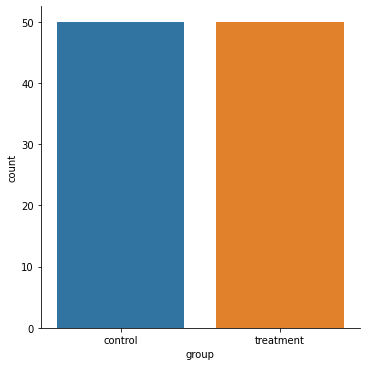

In [12]:
sns.catplot(x = 'group', data = df, kind = 'count');

* There are equal users in both control and user group

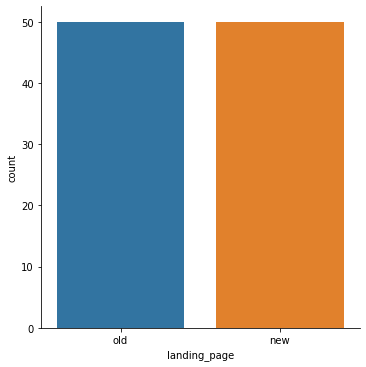

In [13]:
sns.catplot(x = 'landing_page', data = df, kind = 'count');

* There are equal users in old landing page and in new landing page

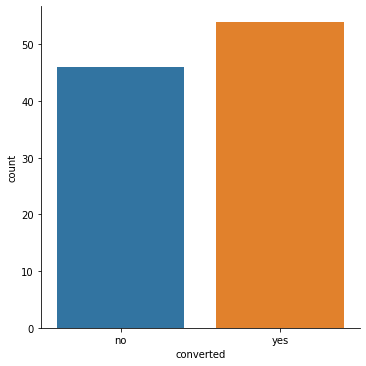

In [14]:
sns.catplot(x = 'converted', data = df, kind = 'count');

* The users who have converted to new landing page is more than the old.

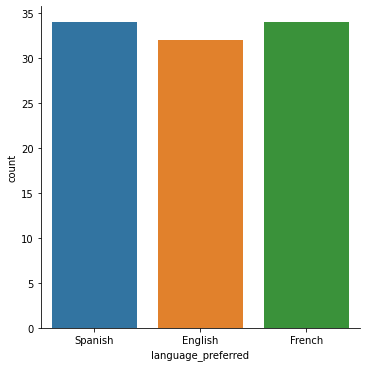

In [15]:
sns.catplot(x = 'language_preferred', data = df, kind = 'count');

* Users who prefer English language is low when compared to Spanish and French users.  

## Bivariate analysis

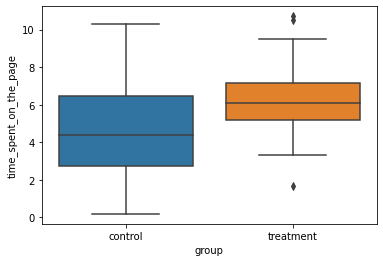

In [16]:
sns.boxplot(df['group'], df['time_spent_on_the_page']);

* Users take more time in the old landing page which is with the control group than the treatment group serving new landing page
* Outliers are present for the time spent on page by the treatment group

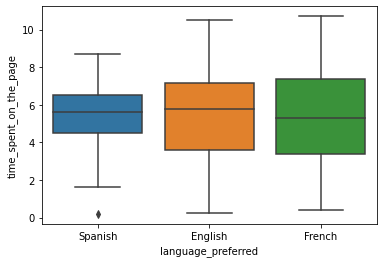

In [17]:
sns.boxplot(df['language_preferred'], df['time_spent_on_the_page']);

* The French language preferred by some of the users take more time on the page
* Outliers are present for Spanish 

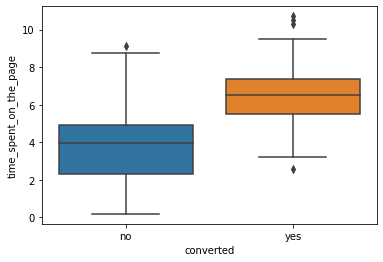

In [18]:
sns.boxplot(df['converted'], df['time_spent_on_the_page']);

* Users who got converted to new landing page spend less time than the users who did not get converted to new landing page (using old landing page).

## Do the users spend more time on the new landing page than the old landing page?

## Step 1: Defining null and alternative hypotheses

* Taking two categorical columns 'group' and 'converted'
** $H_0:$ whether new feature(the new landing page) is more effective to gather new subscribers
** $H_a:$ whether new feature(the new landing page) is not effective to gather new subscribers
* We shall use a Proportions Z test for this problem.
* The significance level given is α = 0.05.

In [19]:
# number of female smokers
Time_spent_by_control_group = df[df['group']=='control'].time_spent_on_the_page.value_counts()
# number of male smokers
Time_spent_by_treatment_group= df[df['group']=='treatment'].time_spent_on_the_page.value_counts()

print('The time_spent_by  control and treatment group are'.format(Time_spent_by_control_group, Time_spent_by_treatment_group))

# number of females in the data
control = df.group.value_counts()['control']

# number of males in the data
treatment = df.group.value_counts()['treatment']

print('The time_spent_by  control and treatment group are'.format(control, treatment))

The time_spent_by  control and treatment group are
The time_spent_by  control and treatment group are


<AxesSubplot:xlabel='time_spent_on_the_page'>

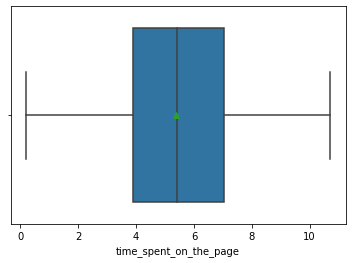

In [20]:
# Visual analysis of the distribution of 'time_spent_on_the_page' column
sns.boxplot(x="time_spent_on_the_page", data = df, showmeans= True)

In [21]:
df['time_spent_on_the_page'].mean()

5.377800000000002

In [22]:
data1=df[df['group']=='treatment']
data1['time_spent_on_the_page'].sum()

311.16

In [23]:
data1=df[df['group']=='control']
data1['time_spent_on_the_page'].sum()

226.62000000000003

In [24]:
data2=df[df['group']=='treatment']
data2['time_spent_on_the_page'].median()

6.105

In [25]:
#Compute the number of unique users who has new page using df2 dataframe
data = df.query('landing_page == "new"')['user_id'].nunique()

#display the number of unique users who has new page
data

50

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [26]:
# number of users converted from control group to the new landing page
converted1 = df[df['group']=='control'].converted.value_counts()['yes']
# number of users not_converted from control group to the new landing page
not_converted1 = df[df['group']=='control'].converted.value_counts()['no']

# number of users converted from treatment group to the old landing page
converted2 = df[df['group']=='treatment'].converted.value_counts()['yes']
# number of users not_converted from treatment group to the old landing page
not_converted2 = df[df['group']=='treatment'].converted.value_counts()['no']

print('The numbers of not_converted1 and converted1 are {0} and {1} respectively'.format(not_converted1, converted1))
print('The numbers of not_converted2 and converted2 are {0} and {1} respectively'.format(not_converted2, converted2))

# number of females in the data
control = df.group.value_counts()['control']

# number of males in the data
treatment = df.group.value_counts()['treatment']

print('The total numbers of not_converted and converted are {0} and {1} respectively'.format(control,treatment))

The numbers of not_converted1 and converted1 are 29 and 21 respectively
The numbers of not_converted2 and converted2 are 17 and 33 respectively
The total numbers of not_converted and converted are 50 and 50 respectively


In [27]:
a=converted1 + converted2
b=not_converted1 + not_converted2
print(a)
print(b)

54
46


In [28]:
print(f' The proportions of not_converted and converted are {round(54/50,2)}, {round(46/50,2)} respectively')

 The proportions of not_converted and converted are 1.08, 0.92 respectively


In [29]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("abtest")
x, y, hue = "group", "proportion", "converted"
hue_order = ["yes", "no"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "df"), x=x, y=y, hue=hue))

ValueError: 'abtest' is not one of the example datasets.

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([converted, not_converted] , [control, treatment], alternative = 'two-sided')

# print the p-value
print('The p-value is '+ str(pval))

In [ ]:
converted_new = df[df['landing_page']=='new']['converted']
converted_old = df[df['landing_page']=='old']['converted']
a=converted_new[converted_new=='yes']
len(a)

In [ ]:
b=converted_new[converted_new=='no']
len(b)

In [ ]:
if (a>b):
    print('')

In [ ]:
c=converted_old[converted_old=='yes']
len(c)

In [ ]:
d=converted_old[converted_old=='no']
len(d)

In [ ]:
df['time_spent_on_the_page'].min()

In [ ]:
sns.displot(df["time_spent_on_the_page"], kde=True)
plt.show()

In [ ]:
pd.crosstab(df['group'], df['landing_page'])

In [ ]:
test_stat, p_value = stats.f_oneway(converted_new, converted_old)
print('The p-value is ', p_value)

## Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

In [30]:

#df['converted'] = df['converted'].astype('integer')

contingency_table = pd.crosstab(df.converted,df.language_preferred) #Contingency Table
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [33]:
#df.converted[0:101]
#df.converted.replace(('yes', 'no'), (1, 0), inplace=True)
#sampleDF.housing.replace(('yes', 'no'), (1, 0), inplace=True) 
df['converted_status'] = df['converted'].map({1:'1',no:'0'}) #Encode the values

NameError: name 'yes' is not defined

In [32]:
df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,converted_status
0,546592,control,old,3.48,no,Spanish,NaN
1,546468,treatment,new,7.13,yes,English,NaN
2,546462,treatment,new,4.40,no,Spanish,NaN
3,546567,control,old,3.02,no,French,NaN
4,546459,treatment,new,4.75,yes,Spanish,NaN
5,546558,control,old,5.28,yes,English,NaN
6,546448,treatment,new,5.25,yes,French,NaN
7,546581,control,old,6.53,yes,Spanish,NaN
8,546461,treatment,new,10.71,yes,French,NaN
9,546548,control,old,2.08,no,English,NaN


In [36]:
df['converted_status'] = df['converted'].map({"yes":'1',"no":'0'}) #Encode the values